## <font color='red'>**1. Situação Problema**

### **Classificação de manutenção preditiva de máquinas**

Conjunto de dados para prever falha de máquina (binário) e tipo (multiclasse)

Sobre o conjunto de dados:\
Conjunto de dados de classificação de manutenção preditiva de máquinas.
Como os conjuntos de dados reais de manutenção preditiva são geralmente difíceis de obter e, em particular, difíceis de publicar, apresentamos e fornecemos um conjunto de dados sintético que reflete a manutenção preditiva real encontrada na indústria, até onde sabemos.

O conjunto de dados consiste em 10.000 pontos de dados armazenados como linhas com 14 recursos em colunas:

- **UID**: identificador exclusivo variando de 1 a 10.000
- **ID do produto**: consistindo em uma letra L, M ou H para baixa (50% de todos os produtos), média (30%) e alta (20%) como variantes de qualidade do produto e um número de série específico da variante.
- **temperatura do ar [K]**: gerada usando um processo de passeio aleatório posteriormente normalizado para um desvio padrão de 2 K em torno de 300 K
- **temperatura do processo [K]**: gerada usando um processo de passeio aleatório normalizado para um desvio padrão de 1 K, adicionado à temperatura do ar mais 10 K.
- **velocidade de rotação [rpm]**: calculada a partir de uma potência de 2860 W, sobreposta a um ruído normalmente distribuído
- **torque [Nm]**: os valores de torque são normalmente distribuídos em torno de 40 Nm com Ïƒ = 10 Nm e sem valores negativos.
- **desgaste da ferramenta [min]**: As variantes de qualidade H/M/L adicionam 5/3/2 minutos de desgaste da ferramenta à ferramenta utilizada no processo.
- O rótulo de 'falha da máquina' que indica se a máquina falhou neste ponto de dados específico para qualquer um dos seguintes modos de falha é verdadeiro.

A falha da máquina consiste em cinco modos de falha independentes
- **falha por desgaste da ferramenta (TWF)**: a ferramenta será substituída ou falha em um tempo de desgaste da ferramenta selecionado aleatoriamente entre 200 - 240 minutos (120 vezes em nosso conjunto de dados). Neste momento, a ferramenta foi substituída 69 vezes e falhou 51 vezes (atribuída aleatoriamente).
- **falha de dissipação de calor (HDF)**: a dissipação de calor causa uma falha no processo, se a diferença entre a temperatura do ar e do processo for inferior a 8,6 K e a velocidade de rotação da ferramenta for inferior a 1380 rpm. Este é o caso de 115 pontos de dados.
- **falha de energia (PWF)**: o produto do torque e da velocidade de rotação (em rad/s) é igual à potência necessária para o processo. Se esta potência estiver abaixo de 3.500 W ou acima de 9.000 W, o processo falha, o que ocorre 95 vezes em nosso conjunto de dados.
- **falha por sobretensão (OSF)**: se o produto do desgaste da ferramenta e o torque exceder 11.000 minNm para a variante do produto L (12.000 M, 13.000 H), o processo falha devido à sobretensão. Isso é verdade para 98 pontos de dados.
- **falhas aleatórias (RNF)**: cada processo tem 0,1% de chance de falhar, independentemente de seus parâmetros de processo. Este é o caso de apenas 5 pontos de dados, menos do que poderia ser esperado para 10.000 pontos de dados no nosso conjunto de dados.

Se pelo menos um dos modos de falha acima for verdadeiro, o processo falha e o rótulo de 'falha da máquina' é definido como 1. Portanto, não é transparente para o método de aprendizado de máquina qual dos modos de falha causou a falha do processo

Alvo: Falha ou Não
Tipo de falha: Tipo de falha

Reconhecimentos:

- Kaggle: https://www.kaggle.com/datasets/shivamb/machine-predictive-maintenance-classification/data\
- UCI: https://archive.ics.uci.edu/ml/datasets/AI4I+2020+Predictive+Maintenance+Dataset

## <font color='yellow'>**2. Classificação Binária**


### <font color='green'>**2.1 Bibliotecas e Configurações**


In [2]:
# Bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Configurações e Cores
sns.set(palette='muted', color_codes=True, style='darkgrid')
sns.color_palette('muted')

[(0.2823529411764706, 0.47058823529411764, 0.8156862745098039),
 (0.9333333333333333, 0.5215686274509804, 0.2901960784313726),
 (0.41568627450980394, 0.8, 0.39215686274509803),
 (0.8392156862745098, 0.37254901960784315, 0.37254901960784315),
 (0.5843137254901961, 0.4235294117647059, 0.7058823529411765),
 (0.5490196078431373, 0.3803921568627451, 0.23529411764705882),
 (0.8627450980392157, 0.49411764705882355, 0.7529411764705882),
 (0.4745098039215686, 0.4745098039215686, 0.4745098039215686),
 (0.8352941176470589, 0.7333333333333333, 0.403921568627451),
 (0.5098039215686274, 0.7764705882352941, 0.8862745098039215)]

### <font color='green'>**2.2 Base de Dados**


#### <font color='pink'>**2.2.1 Fonte dos dados**


In [4]:
df = pd.read_csv('../data/external/ai4i2020.csv')

#### <font color='pink'>**2.2.2 Visualização dos dados e seus atributos**


In [5]:
df.head()

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
0                    1551         42.8                0                0    0   
1                    1408         46.3                3                0    0   
2                    1498         49.4                5                0    0   
3                    1433         39.5                7                0    0   
4                    1408         40.0                9                0    0   

   HDF  PWF  OSF  RNF  
0    0    0    0    0  
1    0    0    0    0  
2    0    0    0    0  
3    0    0    0    0  
4    0    0    0    0

In [6]:
df.head()

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
0                    1551         42.8                0                0    0   
1                    1408         46.3                3                0    0   
2                    1498         49.4                5                0    0   
3                    1433         39.5                7                0    0   
4                    1408         40.0                9                0    0   

   HDF  PWF  OSF  RNF  
0    0    0    0    0  
1    0    0    0    0  
2    0    0    0    0  
3    0    0    0    0  
4    0    0    0    0

### <font color='green'>**2.3 Análise Inicial**


#### <font color='pink'>**2.3.1 Estatísticas Básicas**


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [8]:
df.describe().T

count        mean          std     min      25%  \
UDI                      10000.0  5000.50000  2886.895680     1.0  2500.75   
Air temperature [K]      10000.0   300.00493     2.000259   295.3   298.30   
Process temperature [K]  10000.0   310.00556     1.483734   305.7   308.80   
Rotational speed [rpm]   10000.0  1538.77610   179.284096  1168.0  1423.00   
Torque [Nm]              10000.0    39.98691     9.968934     3.8    33.20   
Tool wear [min]          10000.0   107.95100    63.654147     0.0    53.00   
Machine failure          10000.0     0.03390     0.180981     0.0     0.00   
TWF                      10000.0     0.00460     0.067671     0.0     0.00   
HDF                      10000.0     0.01150     0.106625     0.0     0.00   
PWF                      10000.0     0.00950     0.097009     0.0     0.00   
OSF                      10000.0     0.00980     0.098514     0.0     0.00   
RNF                      10000.0     0.00190     0.043550     0.0     0.00   

                            50%      75%      max  
UDI                      5000.5  7500.25  10000.0  
Air temperature [K]       300.1   301.50    304.5  
Process temperature [K]   310.1   311.10    313.8  
Rotational speed [rpm]   1503.0  1612.00   2886.0  
Torque [Nm]                40.1    46.80     76.6  
Tool wear [min]           108.0   162.00    253.0  
Machine failure             0.0     0.00      1.0  
TWF                         0.0     0.00      1.0  
HDF                         0.0     0.00      1.0  
PWF                         0.0     0.00      1.0  
OSF                         0.0     0.00      1.0  
RNF                         0.0     0.00      1.0

In [9]:
df.shape

(10000, 14)

### <font color='green'>**2.4 Pré-Processamento**


#### <font color='pink'>**2.4.1 Normalização de Texto (Tradução)**


In [10]:
colunas_traduzidas = ['UDI','id_produto', 'tipo_falha', 'temperatura_ar', 'temperatura_processo',
                      'velocidade_rotacao(rpm)', 'torque(Nm)', 'desgaste_ferramenta', 'maquina_falhou', 
                      'falha_desgaste_ferramenta', 'falha_dissipacao_calor', 'falha_energia',
                      'falha_sobretensao', 'falhas_aleatorias']

df.columns = colunas_traduzidas

df.head()

UDI id_produto tipo_falha  temperatura_ar  temperatura_processo  \
0    1     M14860          M           298.1                 308.6   
1    2     L47181          L           298.2                 308.7   
2    3     L47182          L           298.1                 308.5   
3    4     L47183          L           298.2                 308.6   
4    5     L47184          L           298.2                 308.7   

   velocidade_rotacao(rpm)  torque(Nm)  desgaste_ferramenta  maquina_falhou  \
0                     1551        42.8                    0               0   
1                     1408        46.3                    3               0   
2                     1498        49.4                    5               0   
3                     1433        39.5                    7               0   
4                     1408        40.0                    9               0   

   falha_desgaste_ferramenta  falha_dissipacao_calor  falha_energia  \
0                          0                       0              0   
1                          0                       0              0   
2                          0                       0              0   
3                          0                       0              0   
4                          0                       0              0   

   falha_sobretensao  falhas_aleatorias  
0                  0                  0  
1                  0                  0  
2                  0                  0  
3                  0                  0  
4                  0                  0

In [11]:
df['temperatura_ar'] = df['temperatura_ar'] - 273.15
df['temperatura_processo'] = df['temperatura_processo'] - 273.15

df.rename({'temperatura_ar': 'temperatura_ar(C)', 'temperatura_processo': 'temperatura_processo(C)'}, axis=1, inplace=True)
df.head()

UDI id_produto tipo_falha  temperatura_ar(C)  temperatura_processo(C)  \
0    1     M14860          M              24.95                    35.45   
1    2     L47181          L              25.05                    35.55   
2    3     L47182          L              24.95                    35.35   
3    4     L47183          L              25.05                    35.45   
4    5     L47184          L              25.05                    35.55   

   velocidade_rotacao(rpm)  torque(Nm)  desgaste_ferramenta  maquina_falhou  \
0                     1551        42.8                    0               0   
1                     1408        46.3                    3               0   
2                     1498        49.4                    5               0   
3                     1433        39.5                    7               0   
4                     1408        40.0                    9               0   

   falha_desgaste_ferramenta  falha_dissipacao_calor  falha_energia  \
0                          0                       0              0   
1                          0                       0              0   
2                          0                       0              0   
3                          0                       0              0   
4                          0                       0              0   

   falha_sobretensao  falhas_aleatorias  
0                  0                  0  
1                  0                  0  
2                  0                  0  
3                  0                  0  
4                  0                  0

#### <font color='pink'>**2.4.2 Dados Duplicados**


In [12]:
df.duplicated().sum()

0

#### <font color='pink'>**2.4.3 Valores Faltantes**


In [13]:
df.isnull().sum()

UDI                          0
id_produto                   0
tipo_falha                   0
temperatura_ar(C)            0
temperatura_processo(C)      0
velocidade_rotacao(rpm)      0
torque(Nm)                   0
desgaste_ferramenta          0
maquina_falhou               0
falha_desgaste_ferramenta    0
falha_dissipacao_calor       0
falha_energia                0
falha_sobretensao            0
falhas_aleatorias            0
dtype: int64

#### <font color='pink'>**2.4.4 Tratamento de Outliers**


In [14]:
# Funçao gerar gráfico boxplot
def grafico_box_plot(dataframe, titulo, coluna= None, tamanho=(10,4)):

    fig, ax = plt.subplots(figsize=tamanho)
    ax = sns.boxplot(data= dataframe, x= coluna, ax=ax, width=0.4, orient='h')
    ax.set_title(titulo, loc='left')
    plt.show()


In [15]:
# Função identificar outliers e remove-los, retona o dataframe sem outlier
def removedor_outliers(dataframe, coluna):
    q1 = np.percentile(dataframe[coluna], 25)  # Primeiro quartil (Q1)
    q3 = np.percentile(dataframe[coluna], 75)  # Terceiro quartil (Q3)
    iqr = q3 - q1  # Intervalo interquartil (IQR)

    lower_bound = q1 - 1.5 * iqr  # Limite inferior
    upper_bound = q3 + 1.5 * iqr  # Limite superior

    index_outlier = dataframe[(dataframe[coluna] < lower_bound) | (dataframe[coluna] > upper_bound)].index
    dataframe.drop(index_outlier, axis=0, inplace=True)
    print(f'Limite Inferior: {lower_bound}\nLimite Superior: {upper_bound}')
    print(f'Quantidade de outliers removidos: {len(index_outlier)}')
    return dataframe

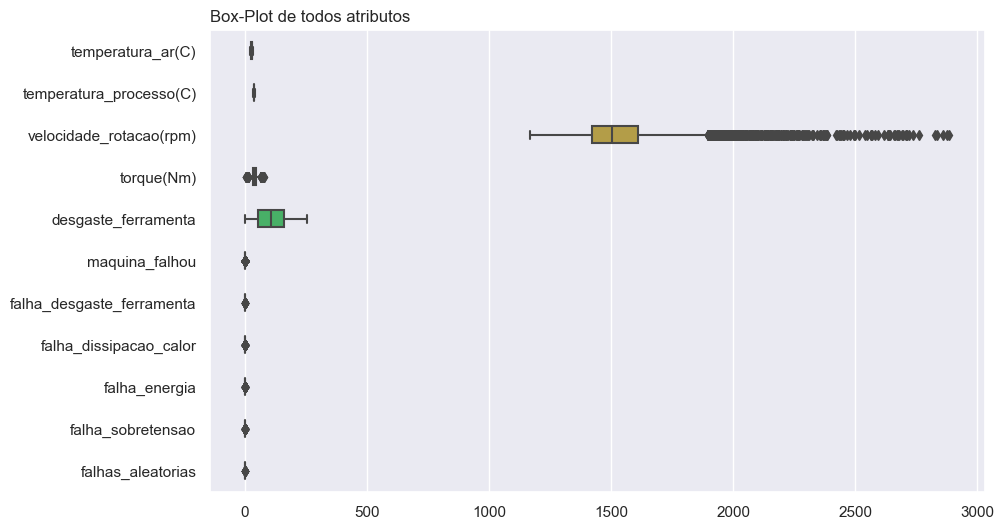

In [16]:
# Visualização dos outliers de todas as colunas
grafico_box_plot(df.iloc[:, 1:],'Box-Plot de todos atributos', tamanho=(10,6))

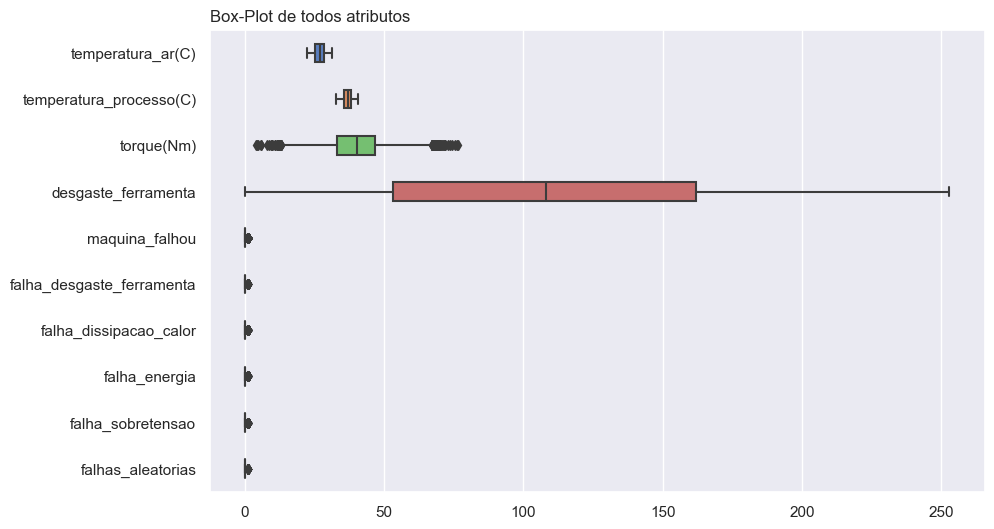

In [17]:
# Visualização de outros outliers de todas as colunas
grafico_box_plot(df.drop(['velocidade_rotacao(rpm)', 'UDI'], axis=1), 'Box-Plot de todos atributos', tamanho=(10,6))


##### <font color='orange'>**2.4.4.1 Coluna Velocidade(rpm)**

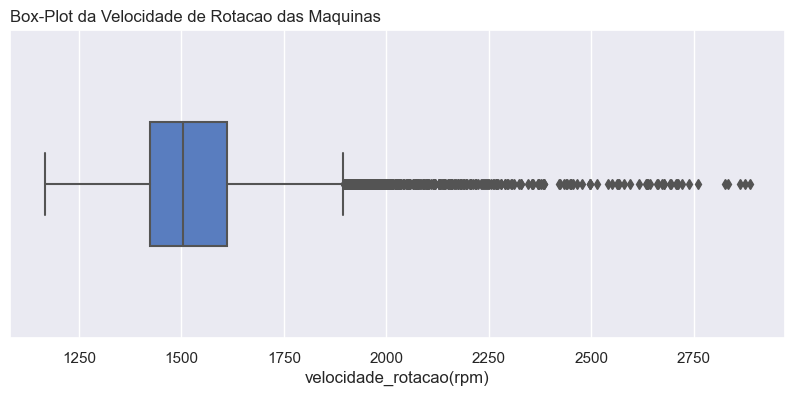

In [18]:
# geração gráfico box-plot 'velocidade_rotacao(rpm)
grafico_box_plot(df, 'Box-Plot da Velocidade de Rotacao das Maquinas',coluna='velocidade_rotacao(rpm)', tamanho=(10,4))

In [19]:
# Removendo os outliers da coluna velocidade_rotacao(rpm)
df = removedor_outliers(df, 'velocidade_rotacao(rpm)')

Limite Inferior: 1139.5
Limite Superior: 1895.5
Quantidade de outliers removidos: 418


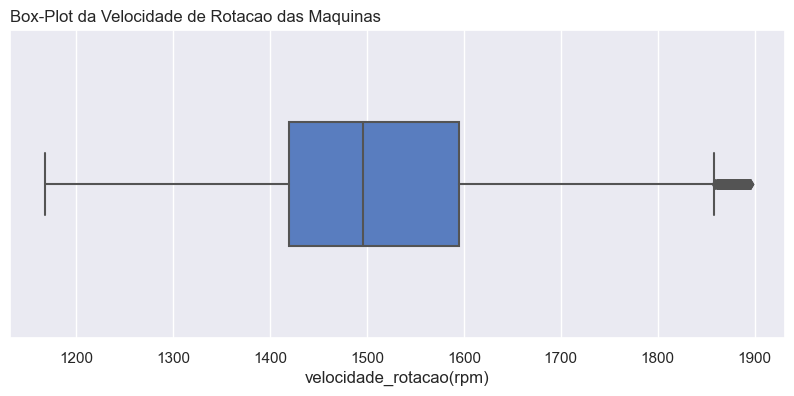

In [20]:
# Verificação visual se os outliers foram removidos
grafico_box_plot(df, 'Box-Plot da Velocidade de Rotacao das Maquinas',coluna='velocidade_rotacao(rpm)', tamanho=(10,4))

##### <font color='orange'>**2.4.4.2 Coluna Torque(Mn)**


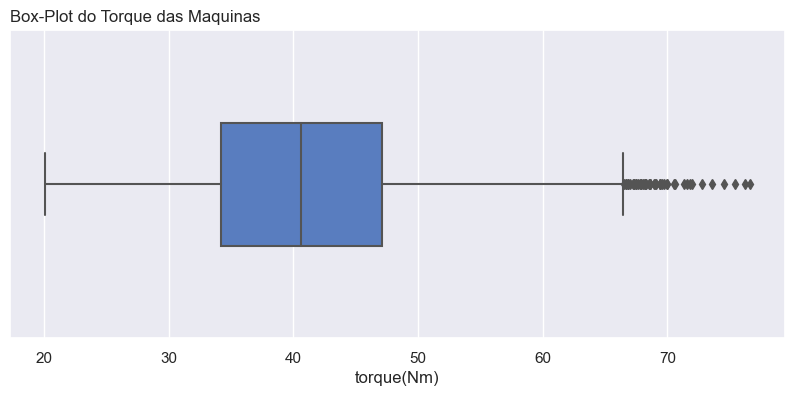

In [21]:
# Verificação visual dos outliers da coluna Torque
grafico_box_plot(df, 'Box-Plot do Torque das Maquinas', coluna='torque(Nm)', tamanho=(10,4))


In [22]:
# Removendo os outliers da coluna torque
df = removedor_outliers(df, 'torque(Nm)')
df

Limite Inferior: 14.850000000000005
Limite Superior: 66.45
Quantidade de outliers removidos: 47


UDI id_produto tipo_falha  temperatura_ar(C)  temperatura_processo(C)  \
0         1     M14860          M              24.95                    35.45   
1         2     L47181          L              25.05                    35.55   
2         3     L47182          L              24.95                    35.35   
3         4     L47183          L              25.05                    35.45   
4         5     L47184          L              25.05                    35.55   
...     ...        ...        ...                ...                      ...   
9995   9996     M24855          M              25.65                    35.25   
9996   9997     H39410          H              25.75                    35.25   
9997   9998     M24857          M              25.85                    35.45   
9998   9999     H39412          H              25.85                    35.55   
9999  10000     M24859          M              25.85                    35.55   

      velocidade_rotacao(rpm)  torque(Nm)  desgaste_ferramenta  \
0                        1551        42.8                    0   
1                        1408        46.3                    3   
2                        1498        49.4                    5   
3                        1433        39.5                    7   
4                        1408        40.0                    9   
...                       ...         ...                  ...   
9995                     1604        29.5                   14   
9996                     1632        31.8                   17   
9997                     1645        33.4                   22   
9998                     1408        48.5                   25   
9999                     1500        40.2                   30   

      maquina_falhou  falha_desgaste_ferramenta  falha_dissipacao_calor  \
0                  0                          0                       0   
1                  0                          0                       0   
2                  0                          0                       0   
3                  0                          0                       0   
4                  0                          0                       0   
...              ...                        ...                     ...   
9995               0                          0                       0   
9996               0                          0                       0   
9997               0                          0                       0   
9998               0                          0                       0   
9999               0                          0                       0   

      falha_energia  falha_sobretensao  falhas_aleatorias  
0                 0                  0                  0  
1                 0                  0                  0  
2                 0                  0                  0  
3                 0                  0                  0  
4                 0                  0                  0  
...             ...                ...                ...  
9995              0                  0                  0  
9996              0                  0                  0  
9997              0                  0                  0  
9998              0                  0                  0  
9999              0                  0                  0  

[9535 rows x 14 columns]

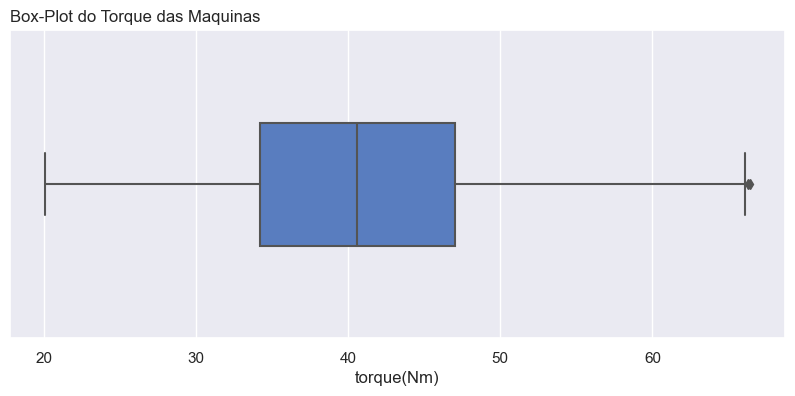

In [23]:
# Verificação visual se os outliers foram removidos
grafico_box_plot(df, 'Box-Plot do Torque das Maquinas', coluna='torque(Nm)', tamanho=(10,4))

In [24]:
# Resetando os index pois os dados estão desordenados
df.reset_index(drop=True, inplace=True)
df

UDI id_produto tipo_falha  temperatura_ar(C)  temperatura_processo(C)  \
0         1     M14860          M              24.95                    35.45   
1         2     L47181          L              25.05                    35.55   
2         3     L47182          L              24.95                    35.35   
3         4     L47183          L              25.05                    35.45   
4         5     L47184          L              25.05                    35.55   
...     ...        ...        ...                ...                      ...   
9530   9996     M24855          M              25.65                    35.25   
9531   9997     H39410          H              25.75                    35.25   
9532   9998     M24857          M              25.85                    35.45   
9533   9999     H39412          H              25.85                    35.55   
9534  10000     M24859          M              25.85                    35.55   

      velocidade_rotacao(rpm)  torque(Nm)  desgaste_ferramenta  \
0                        1551        42.8                    0   
1                        1408        46.3                    3   
2                        1498        49.4                    5   
3                        1433        39.5                    7   
4                        1408        40.0                    9   
...                       ...         ...                  ...   
9530                     1604        29.5                   14   
9531                     1632        31.8                   17   
9532                     1645        33.4                   22   
9533                     1408        48.5                   25   
9534                     1500        40.2                   30   

      maquina_falhou  falha_desgaste_ferramenta  falha_dissipacao_calor  \
0                  0                          0                       0   
1                  0                          0                       0   
2                  0                          0                       0   
3                  0                          0                       0   
4                  0                          0                       0   
...              ...                        ...                     ...   
9530               0                          0                       0   
9531               0                          0                       0   
9532               0                          0                       0   
9533               0                          0                       0   
9534               0                          0                       0   

      falha_energia  falha_sobretensao  falhas_aleatorias  
0                 0                  0                  0  
1                 0                  0                  0  
2                 0                  0                  0  
3                 0                  0                  0  
4                 0                  0                  0  
...             ...                ...                ...  
9530              0                  0                  0  
9531              0                  0                  0  
9532              0                  0                  0  
9533              0                  0                  0  
9534              0                  0                  0  

[9535 rows x 14 columns]

#### <font color='pink'>**2.4.5 Variaveis Alvo**


In [107]:
print(df['tipo_falha'].value_counts())
print()
print(df['tipo_falha'].value_counts(normalize=True)*100)

tipo_falha
L    5713
M    2859
H     963
Name: count, dtype: int64

tipo_falha
L    59.916099
M    29.984268
H    10.099633
Name: proportion, dtype: float64


In [106]:
print(df['maquina_falhou'].value_counts(normalize=False))
print('')
print(df['maquina_falhou'].value_counts(normalize=True)*100)

maquina_falhou
0    9272
1     263
Name: count, dtype: int64

maquina_falhou
0    97.241741
1     2.758259
Name: proportion, dtype: float64


In [98]:
print(df['falha_desgaste_ferramenta'].value_counts(normalize=True)*100) 

falha_desgaste_ferramenta
0    99.559518
1     0.440482
Name: proportion, dtype: float64


In [99]:
print(df['falha_dissipacao_calor'].value_counts(normalize=True)*100

falha_dissipacao_calor
0    98.846356
1     1.153644
Name: proportion, dtype: float64


In [100]:
print(df['falha_energia'].value_counts(normalize=True)*100)

falha_energia
0    99.716833
1     0.283167
Name: proportion, dtype: float64


In [101]:
print(df['falha_sobretensao'].value_counts(normalize=True)*100)

falha_sobretensao
0    99.077084
1     0.922916
Name: proportion, dtype: float64


In [102]:
print(df['falhas_aleatorias'].value_counts(normalize=True)*100)

falhas_aleatorias
0    99.800734
1     0.199266
Name: proportion, dtype: float64


### <font color='green'>**2.5 Análise Exploratória (Gráficos e Insigths)**


In [25]:
colunas_numericas = df.select_dtypes(exclude='object')
colunas_numericas

UDI  temperatura_ar(C)  temperatura_processo(C)  \
0         1              24.95                    35.45   
1         2              25.05                    35.55   
2         3              24.95                    35.35   
3         4              25.05                    35.45   
4         5              25.05                    35.55   
...     ...                ...                      ...   
9530   9996              25.65                    35.25   
9531   9997              25.75                    35.25   
9532   9998              25.85                    35.45   
9533   9999              25.85                    35.55   
9534  10000              25.85                    35.55   

      velocidade_rotacao(rpm)  torque(Nm)  desgaste_ferramenta  \
0                        1551        42.8                    0   
1                        1408        46.3                    3   
2                        1498        49.4                    5   
3                        1433        39.5                    7   
4                        1408        40.0                    9   
...                       ...         ...                  ...   
9530                     1604        29.5                   14   
9531                     1632        31.8                   17   
9532                     1645        33.4                   22   
9533                     1408        48.5                   25   
9534                     1500        40.2                   30   

      maquina_falhou  falha_desgaste_ferramenta  falha_dissipacao_calor  \
0                  0                          0                       0   
1                  0                          0                       0   
2                  0                          0                       0   
3                  0                          0                       0   
4                  0                          0                       0   
...              ...                        ...                     ...   
9530               0                          0                       0   
9531               0                          0                       0   
9532               0                          0                       0   
9533               0                          0                       0   
9534               0                          0                       0   

      falha_energia  falha_sobretensao  falhas_aleatorias  
0                 0                  0                  0  
1                 0                  0                  0  
2                 0                  0                  0  
3                 0                  0                  0  
4                 0                  0                  0  
...             ...                ...                ...  
9530              0                  0                  0  
9531              0                  0                  0  
9532              0                  0                  0  
9533              0                  0                  0  
9534              0                  0                  0  

[9535 rows x 12 columns]

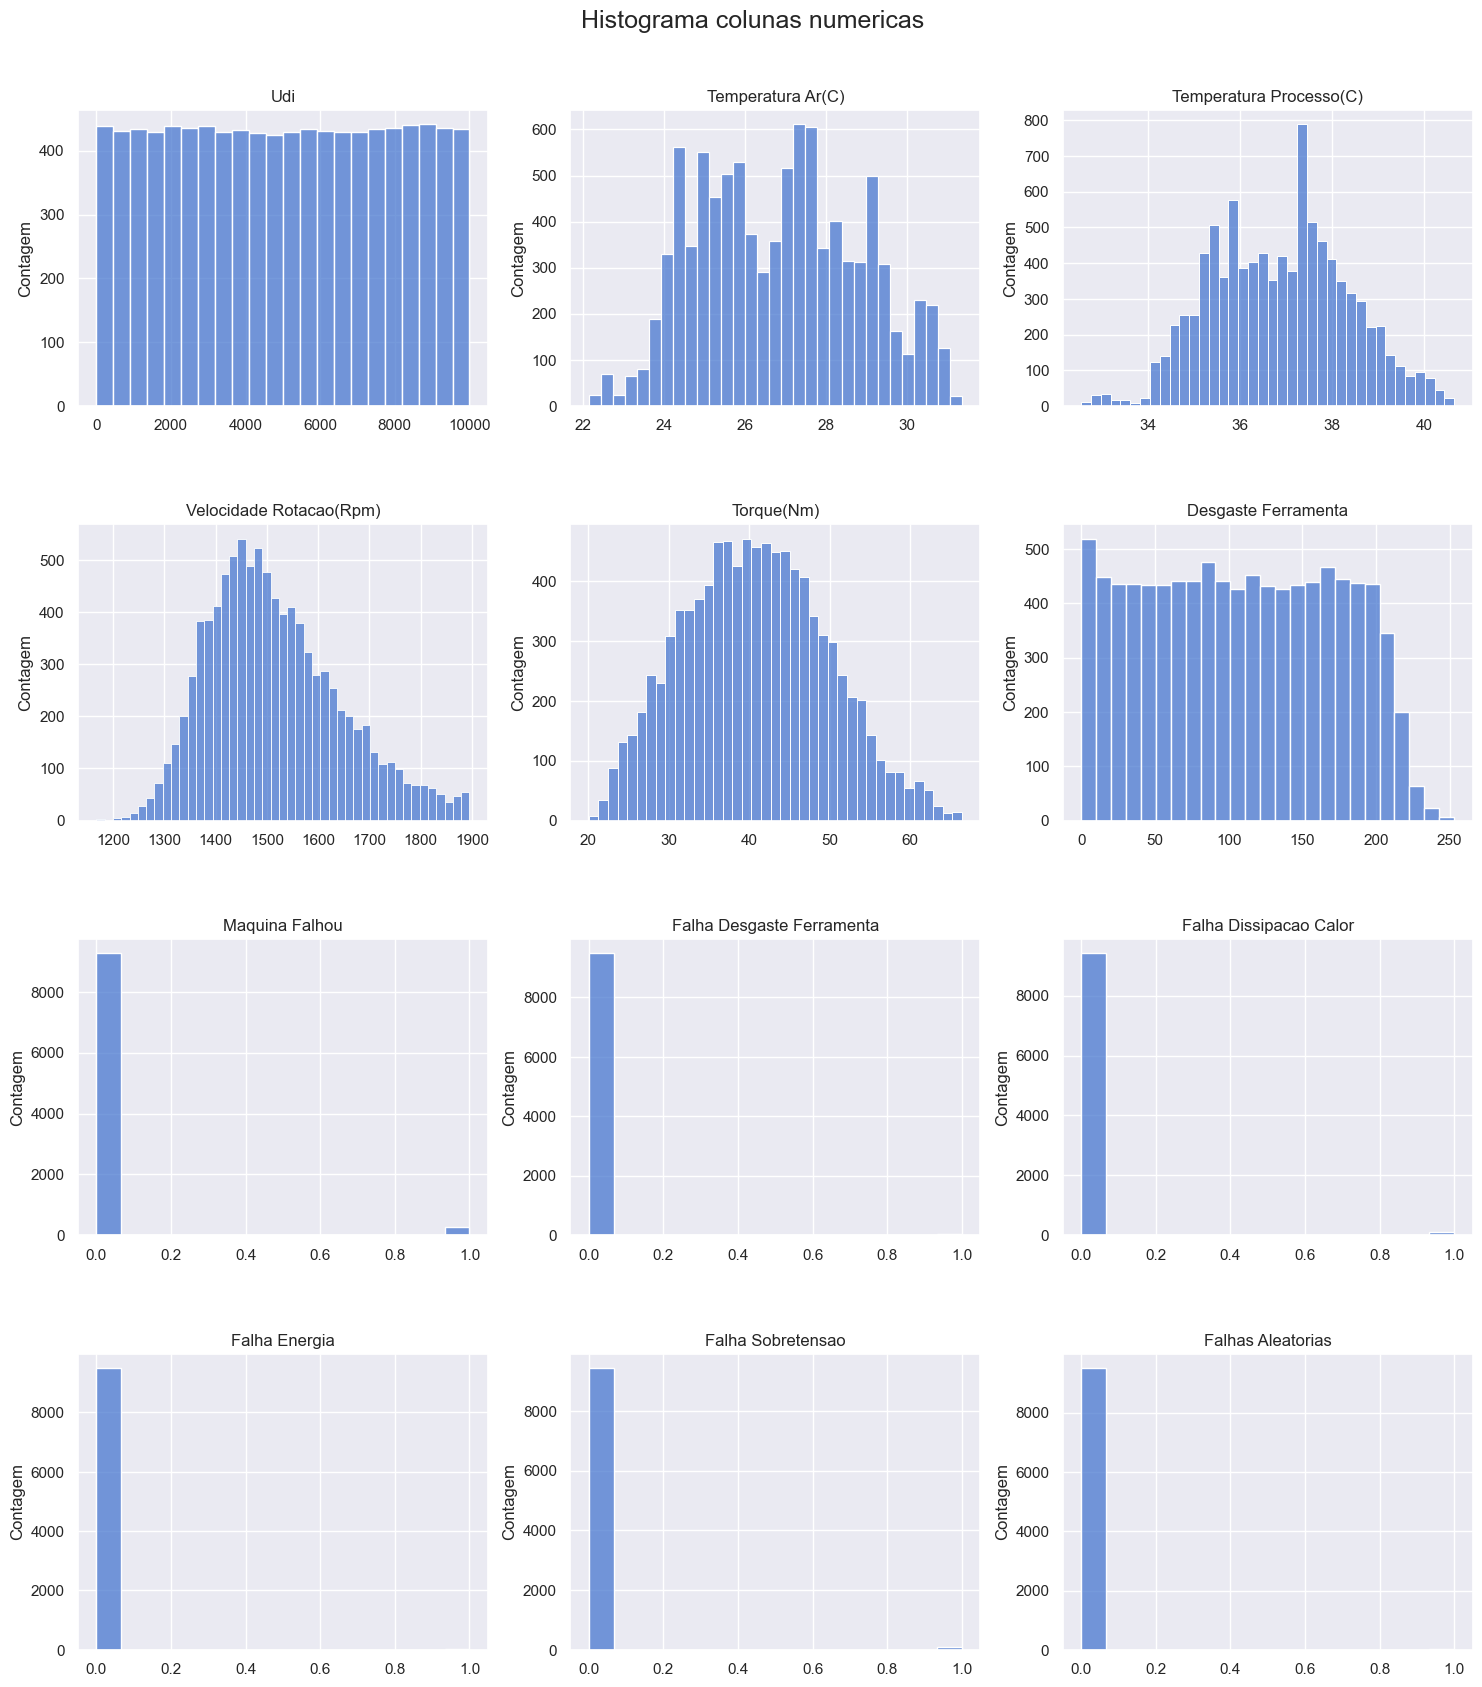

In [26]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 20))

plt.suptitle('Histograma colunas numericas', y=0.93, fontsize=18)
plt.subplots_adjust(wspace=0.2, hspace=0.4)

for i, axs in enumerate(axes.flatten()):
    ax = sns.histplot(data=df, x=colunas_numericas.columns[i], ax=axs)  # Correção aqui, removendo o ponto no final da linha
    ax.set_title(f'{colunas_numericas.columns[i]}'.replace('_', ' ').title())
    ax.set_xlabel('')
    ax.set_ylabel('Contagem')


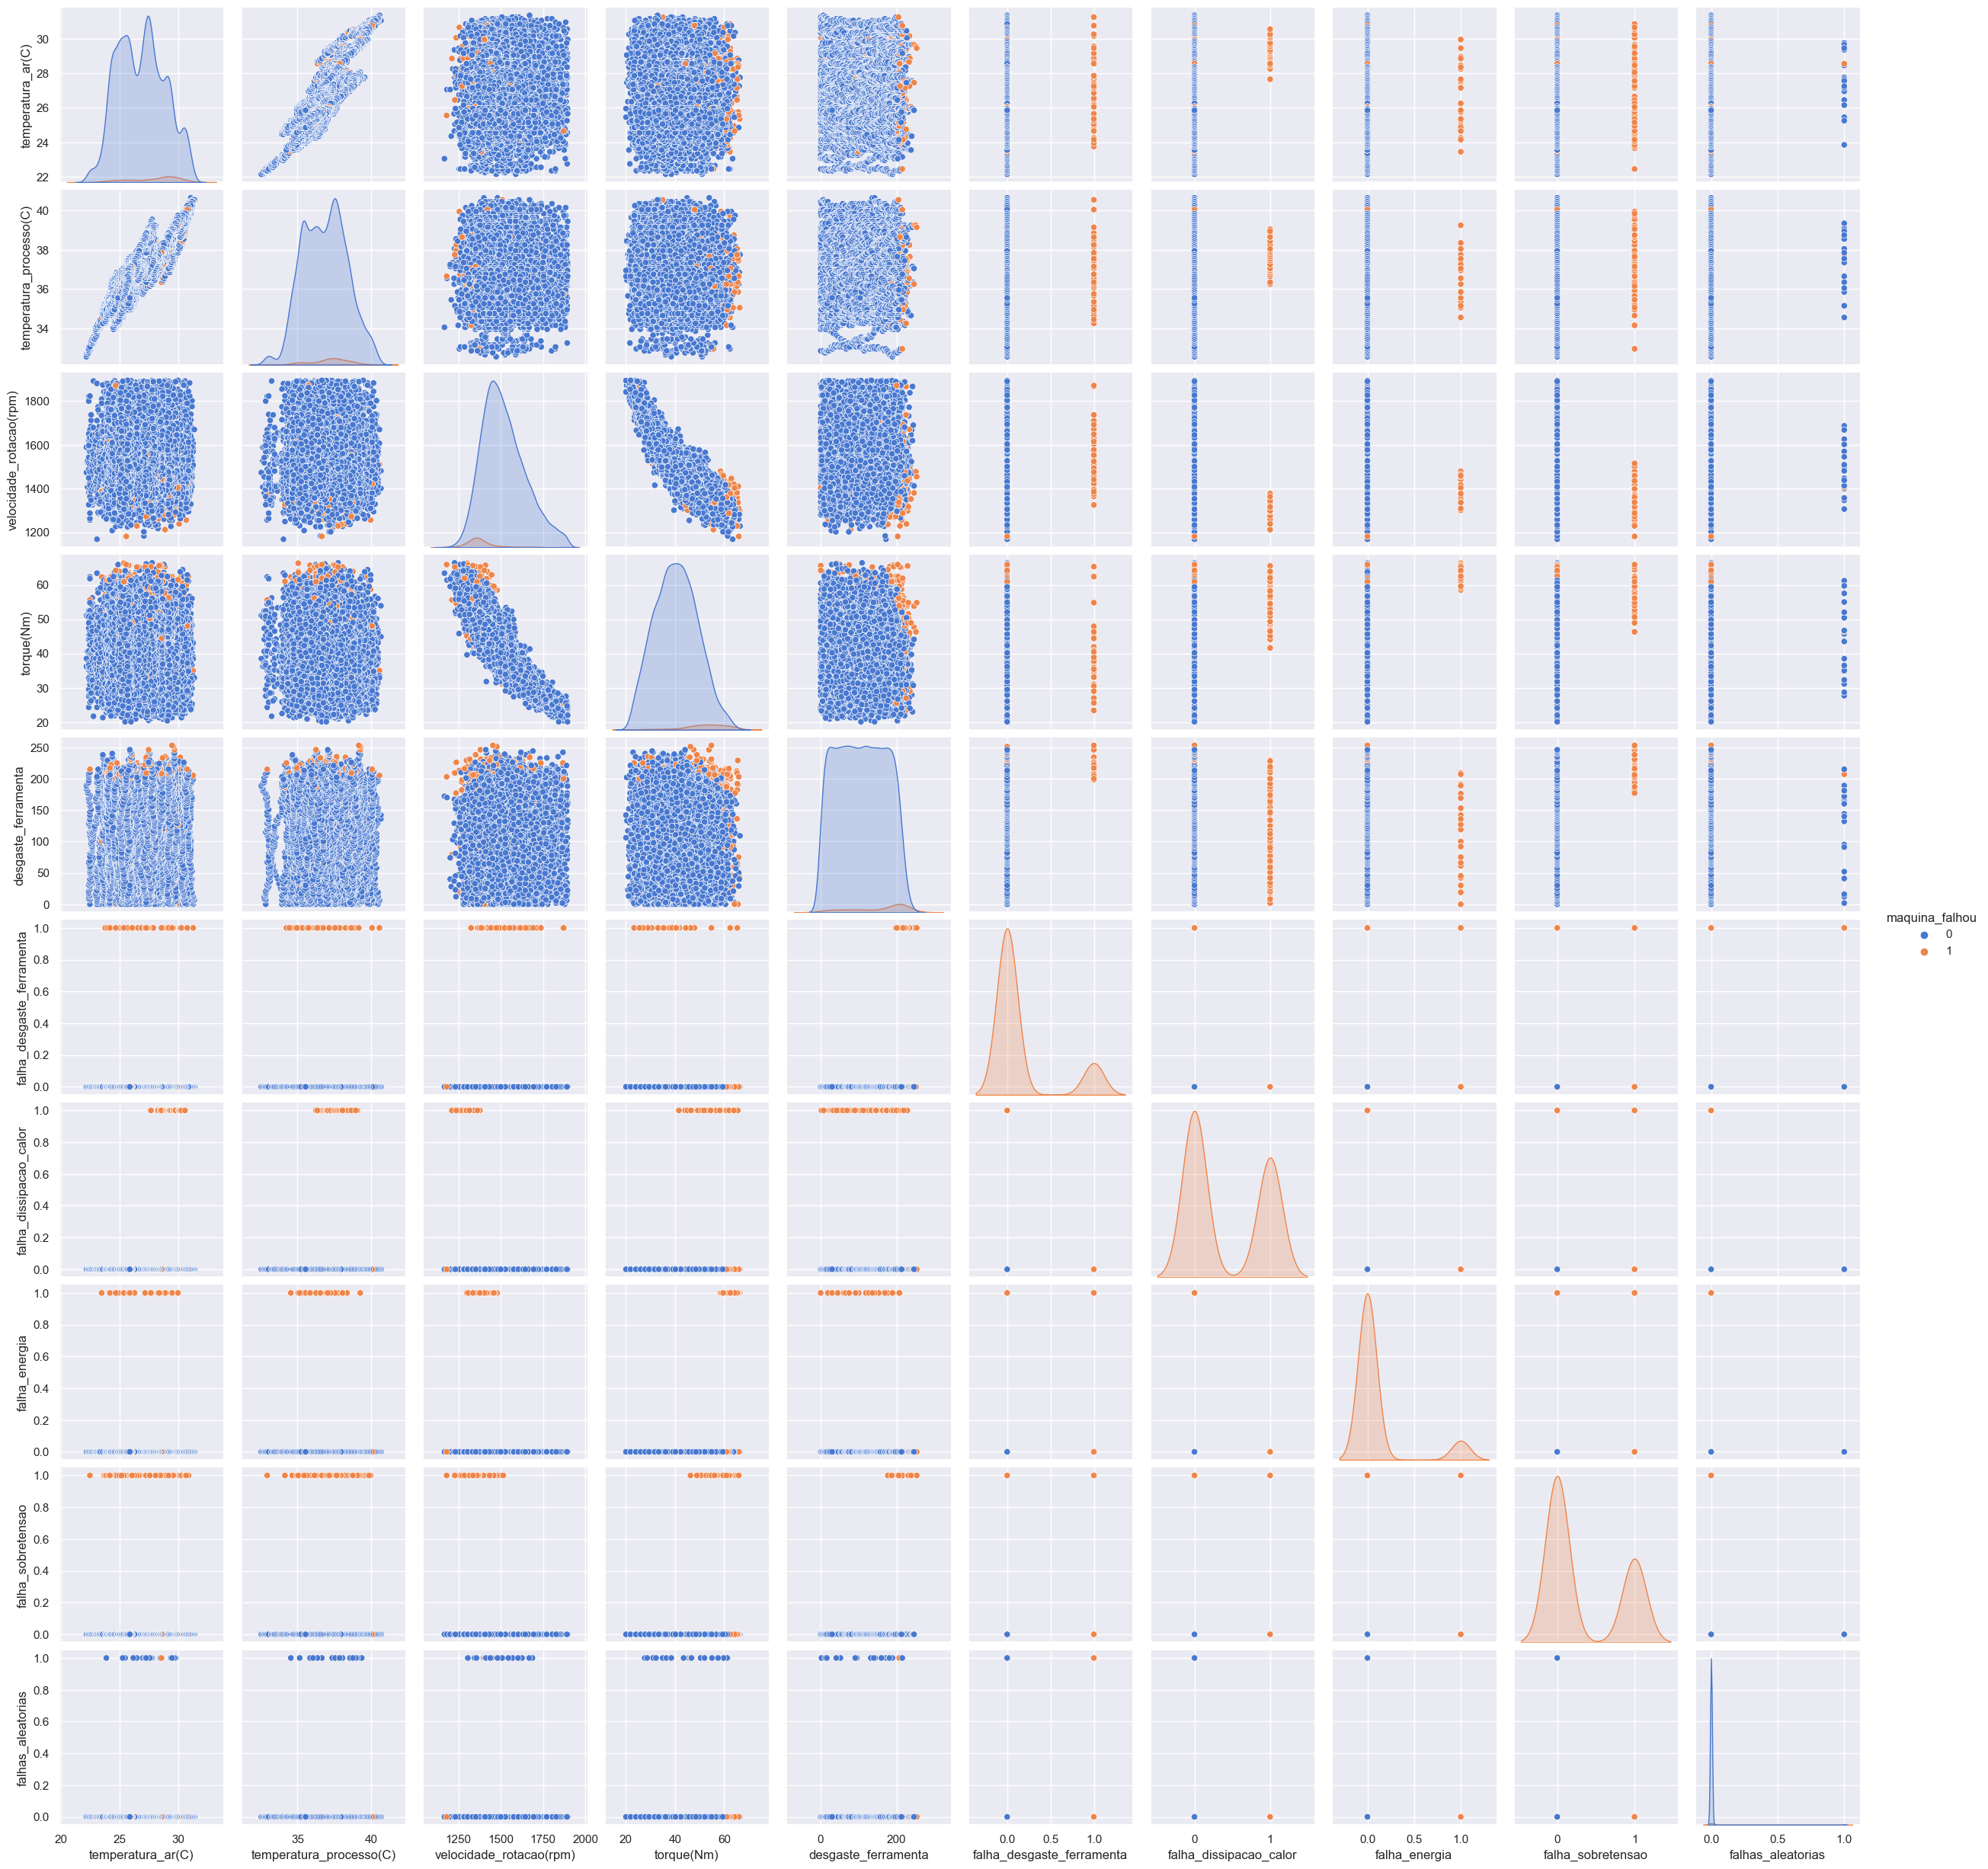

In [27]:
sns.pairplot(data=df.drop('UDI', axis=1), hue='maquina_falhou')

<Axes: xlabel='maquina_falhou', ylabel='count'>

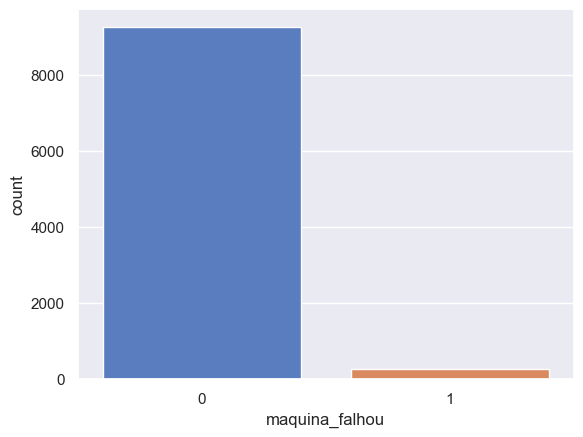

In [28]:
sns.countplot(x=df['maquina_falhou'])

<Axes: xlabel='tipo_falha', ylabel='count'>

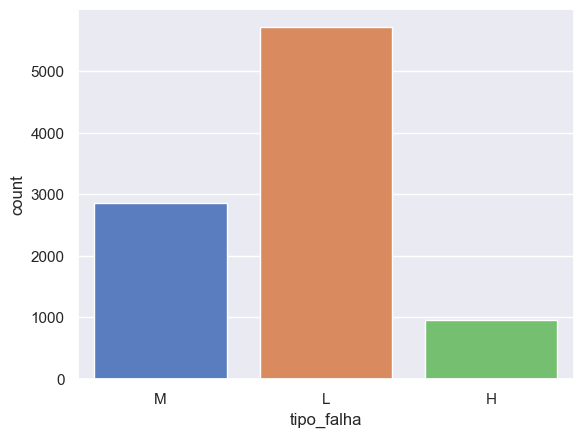

In [40]:
sns.countplot(x=df['tipo_falha'])


In [62]:
df.head()

UDI id_produto tipo_falha  temperatura_ar(C)  temperatura_processo(C)  \
0    1     M14860          M              24.95                    35.45   
1    2     L47181          L              25.05                    35.55   
2    3     L47182          L              24.95                    35.35   
3    4     L47183          L              25.05                    35.45   
4    5     L47184          L              25.05                    35.55   

   velocidade_rotacao(rpm)  torque(Nm)  desgaste_ferramenta  maquina_falhou  \
0                     1551        42.8                    0               0   
1                     1408        46.3                    3               0   
2                     1498        49.4                    5               0   
3                     1433        39.5                    7               0   
4                     1408        40.0                    9               0   

   falha_desgaste_ferramenta  falha_dissipacao_calor  falha_energia  \
0                          0                       0              0   
1                          0                       0              0   
2                          0                       0              0   
3                          0                       0              0   
4                          0                       0              0   

   falha_sobretensao  falhas_aleatorias  
0                  0                  0  
1                  0                  0  
2                  0                  0  
3                  0                  0  
4                  0                  0

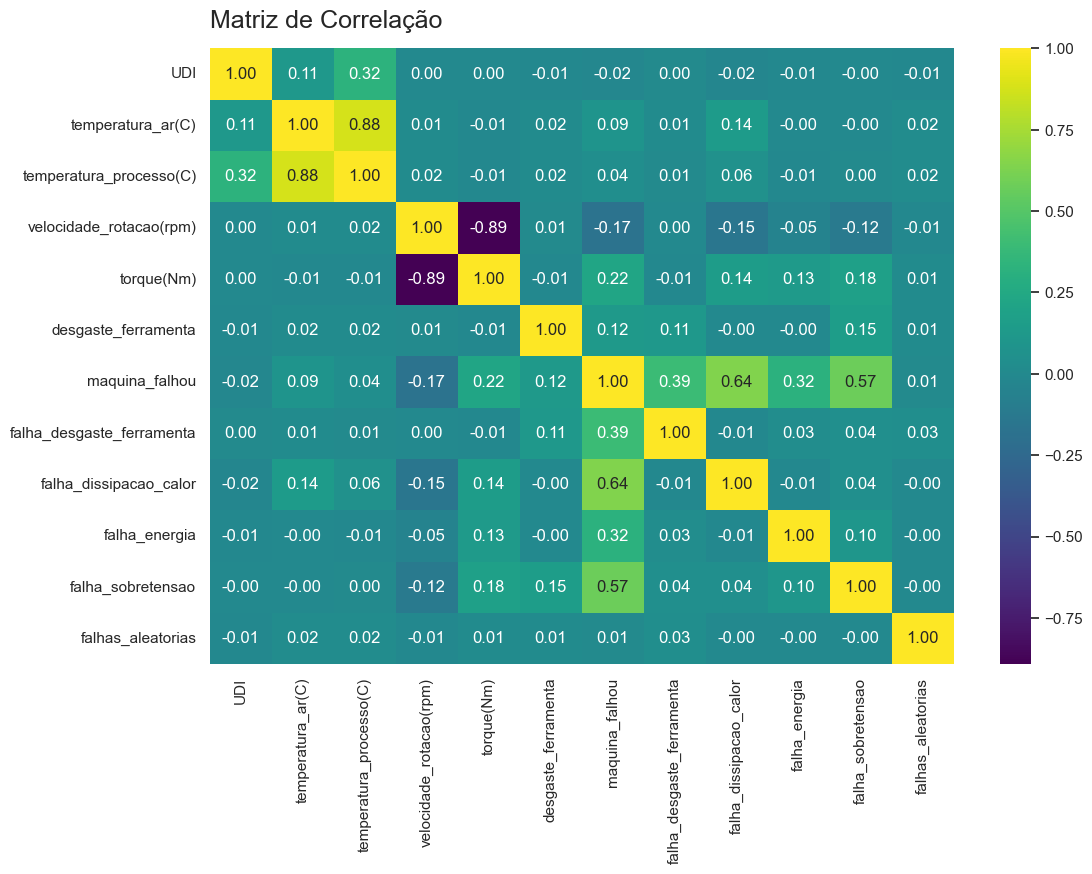

In [76]:
matriz_correlacao = df.select_dtypes(exclude='object').corr()

fig, ax = plt.subplots(figsize=(12,8))
ax = sns.heatmap(matriz_correlacao, annot=True, fmt='.2f', cmap='viridis')
ax.set_title('Matriz de Correlação', fontsize=18, loc='left', y=1.02)
plt.show()

### <font color='green'>**2.6 Seleção de Atributos (Feature selection)**


In [41]:
df.head()

UDI id_produto tipo_falha  temperatura_ar(C)  temperatura_processo(C)  \
0    1     M14860          M              24.95                    35.45   
1    2     L47181          L              25.05                    35.55   
2    3     L47182          L              24.95                    35.35   
3    4     L47183          L              25.05                    35.45   
4    5     L47184          L              25.05                    35.55   

   velocidade_rotacao(rpm)  torque(Nm)  desgaste_ferramenta  maquina_falhou  \
0                     1551        42.8                    0               0   
1                     1408        46.3                    3               0   
2                     1498        49.4                    5               0   
3                     1433        39.5                    7               0   
4                     1408        40.0                    9               0   

   falha_desgaste_ferramenta  falha_dissipacao_calor  falha_energia  \
0                          0                       0              0   
1                          0                       0              0   
2                          0                       0              0   
3                          0                       0              0   
4                          0                       0              0   

   falha_sobretensao  falhas_aleatorias  
0                  0                  0  
1                  0                  0  
2                  0                  0  
3                  0                  0  
4                  0                  0

In [42]:
df_ml = df.iloc[:, 3:9]
df_ml.head()

temperatura_ar(C)  temperatura_processo(C)  velocidade_rotacao(rpm)  \
0              24.95                    35.45                     1551   
1              25.05                    35.55                     1408   
2              24.95                    35.35                     1498   
3              25.05                    35.45                     1433   
4              25.05                    35.55                     1408   

   torque(Nm)  desgaste_ferramenta  maquina_falhou  
0        42.8                    0               0  
1        46.3                    3               0  
2        49.4                    5               0  
3        39.5                    7               0  
4        40.0                    9               0

In [43]:
df_ml_multiclasse = df.iloc[:, 2:8]
df_ml_multiclasse.head()

tipo_falha  temperatura_ar(C)  temperatura_processo(C)  \
0          M              24.95                    35.45   
1          L              25.05                    35.55   
2          L              24.95                    35.35   
3          L              25.05                    35.45   
4          L              25.05                    35.55   

   velocidade_rotacao(rpm)  torque(Nm)  desgaste_ferramenta  
0                     1551        42.8                    0  
1                     1408        46.3                    3  
2                     1498        49.4                    5  
3                     1433        39.5                    7  
4                     1408        40.0                    9

### <font color='green'>**2.7 Machine Learning**



In [55]:
# Models
from sklearn.model_selection import train_test_split

# Processamento
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE

# Algoritmos
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# Métricas
from sklearn.metrics import accuracy_score, classification_report, RocCurveDisplay,\
                            PrecisionRecallDisplay, roc_auc_score, roc_curve,\
                            average_precision_score, recall_score, precision_recall_curve,\
                            confusion_matrix

#### <font color='pink'>**2.7.1 Divisão base de dados (entre previsores e classe)**

In [47]:
df_ml.head()

temperatura_ar(C)  temperatura_processo(C)  velocidade_rotacao(rpm)  \
0              24.95                    35.45                     1551   
1              25.05                    35.55                     1408   
2              24.95                    35.35                     1498   
3              25.05                    35.45                     1433   
4              25.05                    35.55                     1408   

   torque(Nm)  desgaste_ferramenta  maquina_falhou  
0        42.8                    0               0  
1        46.3                    3               0  
2        49.4                    5               0  
3        39.5                    7               0  
4        40.0                    9               0

In [48]:
X = df_ml.drop('maquina_falhou', axis=1)
y = df_ml['maquina_falhou']

In [49]:
X.head()

temperatura_ar(C)  temperatura_processo(C)  velocidade_rotacao(rpm)  \
0              24.95                    35.45                     1551   
1              25.05                    35.55                     1408   
2              24.95                    35.35                     1498   
3              25.05                    35.45                     1433   
4              25.05                    35.55                     1408   

   torque(Nm)  desgaste_ferramenta  
0        42.8                    0  
1        46.3                    3  
2        49.4                    5  
3        39.5                    7  
4        40.0                    9

In [50]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: maquina_falhou, dtype: int64

#### <font color='pink'>**2.7.2 Padronização dos Dados**

In [51]:
# Padronizando os dados
scaler = MinMaxScaler()

X_scaler = scaler.fit_transform(X)
X_scaler

array([[0.30434783, 0.35802469, 0.52682256, 0.49028078, 0.        ],
       [0.31521739, 0.37037037, 0.3301238 , 0.56587473, 0.01185771],
       [0.30434783, 0.34567901, 0.45392022, 0.63282937, 0.01976285],
       ...,
       [0.40217391, 0.35802469, 0.65612105, 0.28725702, 0.08695652],
       [0.40217391, 0.37037037, 0.3301238 , 0.61339093, 0.09881423],
       [0.40217391, 0.37037037, 0.45667125, 0.43412527, 0.11857708]])

#### <font color='pink'>**2.7.3 Modelos de Classificação**


In [52]:
# Divisão em treino e teste

X_train, X_test, y_train, y_test = train_test_split(X_scaler, y, test_size=0.25)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7151, 5), (2384, 5), (7151,), (2384,))

Modelo Knn:
Acurácia: 0.97
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      2306
           1       0.77      0.22      0.34        78

    accuracy                           0.97      2384
   macro avg       0.87      0.61      0.66      2384
weighted avg       0.97      0.97      0.96      2384



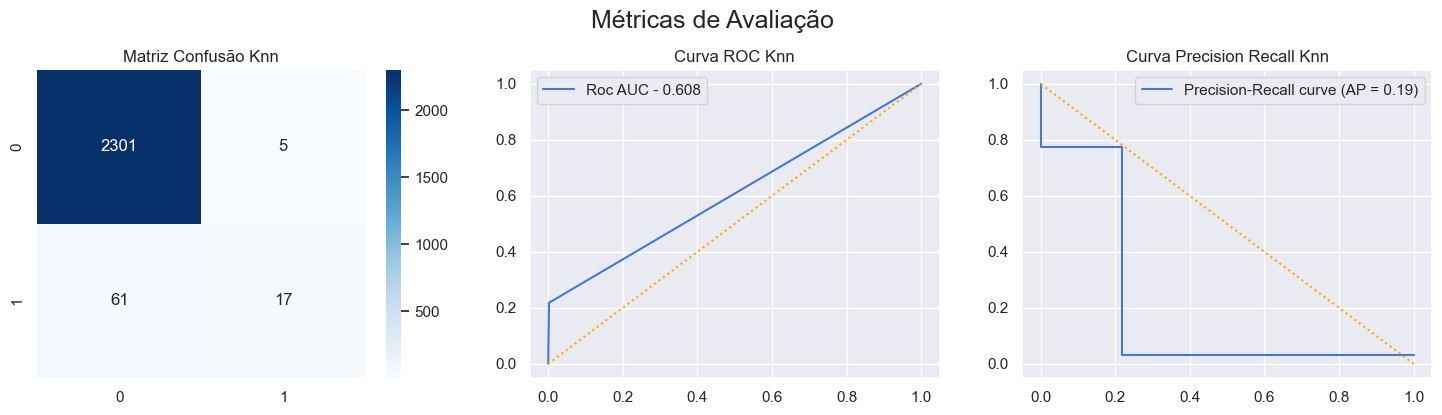

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Modelo Naive bayes:
Acurácia: 0.97
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2306
           1       0.56      0.24      0.34        78

    accuracy                           0.97      2384
   macro avg       0.77      0.62      0.66      2384
weighted avg       0.96      0.97      0.96      2384



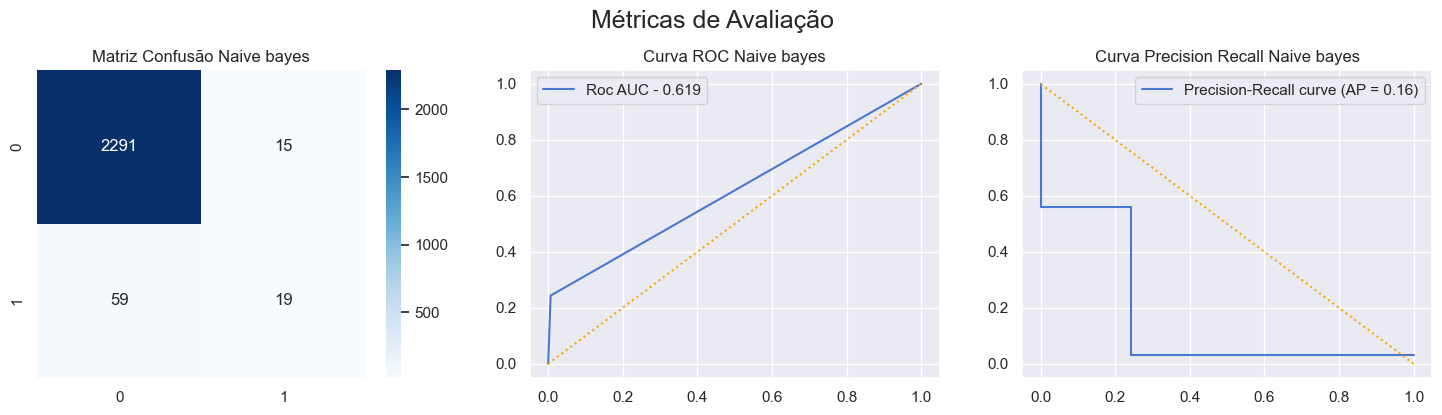

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Modelo Tree:
Acurácia: 0.98
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2306
           1       0.69      0.69      0.69        78

    accuracy                           0.98      2384
   macro avg       0.84      0.84      0.84      2384
weighted avg       0.98      0.98      0.98      2384



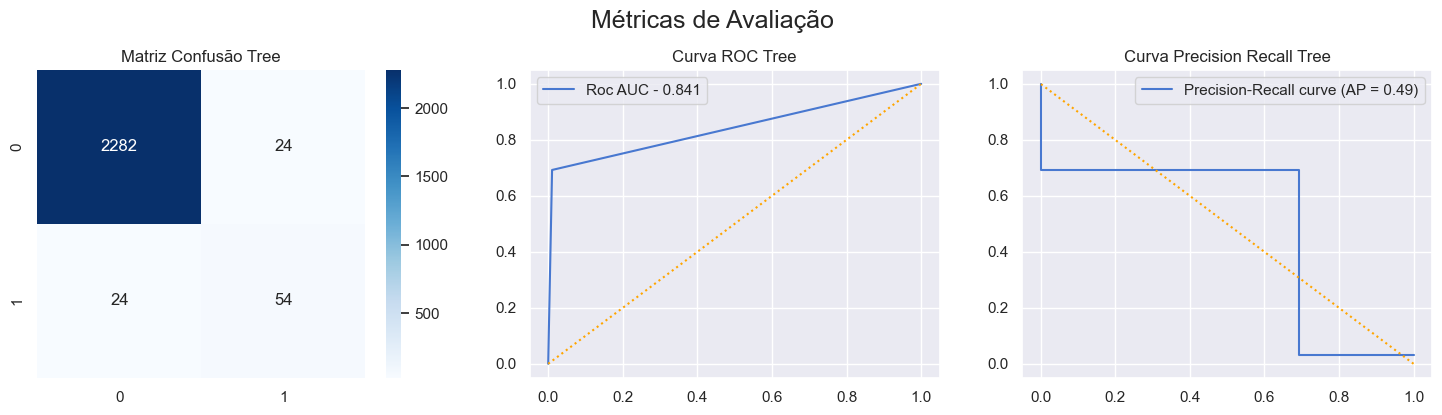

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Modelo Random forest:
Acurácia: 0.98
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2306
           1       0.93      0.47      0.63        78

    accuracy                           0.98      2384
   macro avg       0.95      0.74      0.81      2384
weighted avg       0.98      0.98      0.98      2384



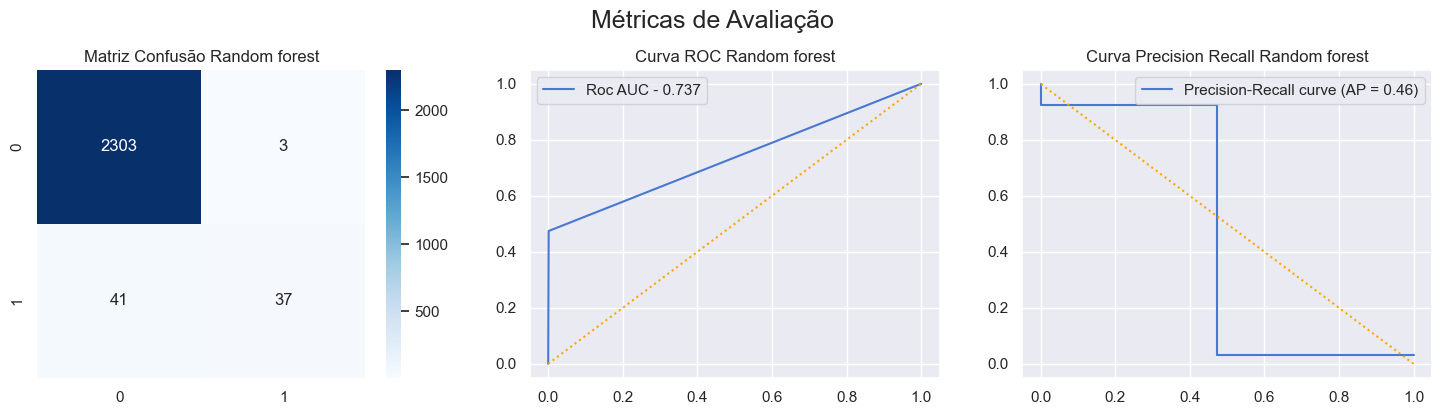

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Modelo Svm:
Acurácia: 0.97
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2306
           1       1.00      0.05      0.10        78

    accuracy                           0.97      2384
   macro avg       0.98      0.53      0.54      2384
weighted avg       0.97      0.97      0.96      2384



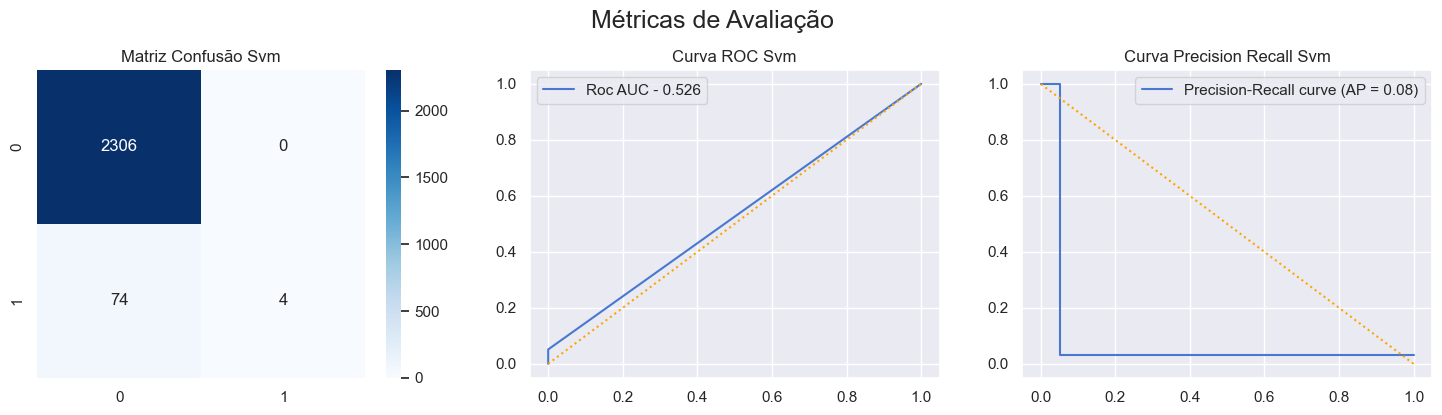

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Modelo Rna:
Acurácia: 0.97
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      2306
           1       1.00      0.22      0.36        78

    accuracy                           0.97      2384
   macro avg       0.99      0.61      0.67      2384
weighted avg       0.98      0.97      0.97      2384



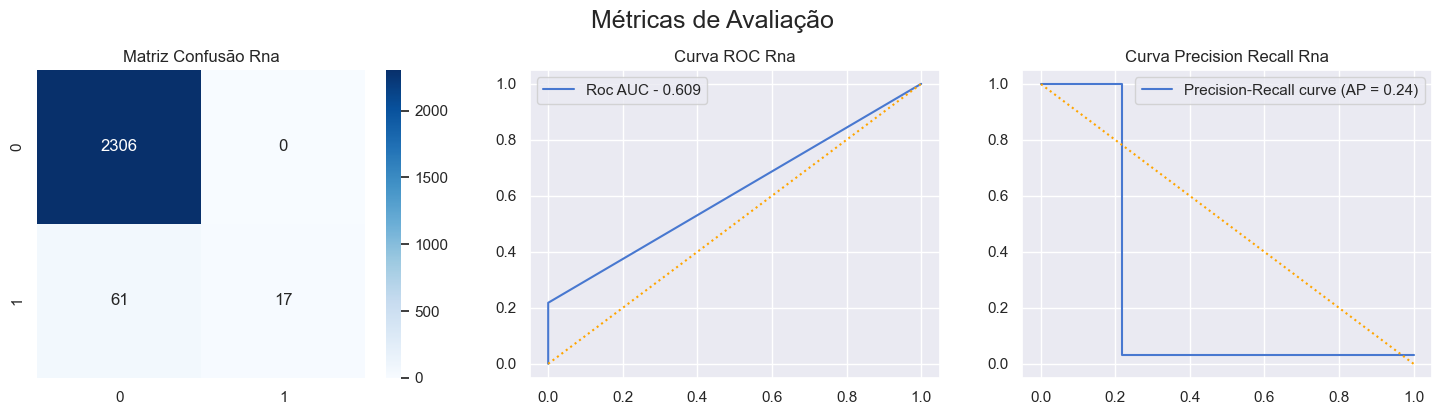

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


In [54]:
# Treinando o modelo e vendo suas métricas

models = {
    'dummy': DummyClassifier(),
    'knn': KNeighborsClassifier(),
    'naive_bayes': GaussianNB(),
    'naive_bayes2': BernoulliNB(),
    'tree': DecisionTreeClassifier(),
    'random_forest': RandomForestClassifier(),
    'svm': SVC(),
    'rna': MLPClassifier(max_iter=1000)
}

for name_model, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Métricas de Avaliação
    acuracia = accuracy_score(y_test, y_pred)
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_score = roc_auc_score(y_test, y_pred)
    avg_precision = average_precision_score(y_test, y_pred,)
    roc_recall = recall_score(y_test, y_pred)
    precision, recall, _ = precision_recall_curve(y_test, y_pred)
    avg_precision = average_precision_score(y_test, y_pred)
    matriz_confusao = confusion_matrix(y_test, y_pred)

    print(f"Modelo {name_model.replace('_', ' ').capitalize()}:")
    print(f'Acurácia: {acuracia:.2f}')
    print(classification_report(y_test, y_pred))

    # Gráficos
    fig, ax = plt.subplots(1, 3, figsize=(18,4))
    plt.suptitle('Métricas de Avaliação', y=1.03, fontsize=18)

    ax[0] = sns.heatmap(matriz_confusao, annot=True, fmt='.0f', cmap='Blues', ax=ax[0])
    ax[0].set_title(f"Matriz Confusão {name_model.replace('_', ' ').capitalize()}")

    ax[1].plot(fpr, tpr)
    ax[1].plot([0,1],[0,1], ls=':', c='orange')
    ax[1].legend([f'Roc AUC - {roc_score:.3f}'])
    ax[1].set_title(f"Curva ROC {name_model.replace('_', ' ').capitalize()}")

    ax[2].step(recall, precision, color='b', where='post', label='Precision-Recall curve (AP = %0.2f)' % avg_precision)
    ax[2].plot([1,0],[0,1], ls=':', c='orange')
    ax[2].set_title(f"Curva Precision Recall {name_model.replace('_', ' ').capitalize()}")
    ax[2].legend()

    plt.show()
    print('-----'*30)



#### <font color='pink'>**2.7.4 Balanceamento dos Dados**


In [56]:
# Balanceamento dos dados
smote = SMOTE(sampling_strategy='minority')
X_scaler_smote, y_smote = smote.fit_resample(X_scaler, y)

In [57]:
X_scaler_smote.shape, y_smote.shape

((18544, 5), (18544,))

In [58]:
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_scaler_smote, y_smote, test_size=0.25)
X_train_smote.shape, X_test_smote.shape, y_train_smote.shape, y_test_smote.shape

((13908, 5), (4636, 5), (13908,), (4636,))

Modelo Knn:
Acurácia: 0.97
              precision    recall  f1-score   support

           0       1.00      0.94      0.97      2372
           1       0.94      1.00      0.97      2264

    accuracy                           0.97      4636
   macro avg       0.97      0.97      0.97      4636
weighted avg       0.97      0.97      0.97      4636



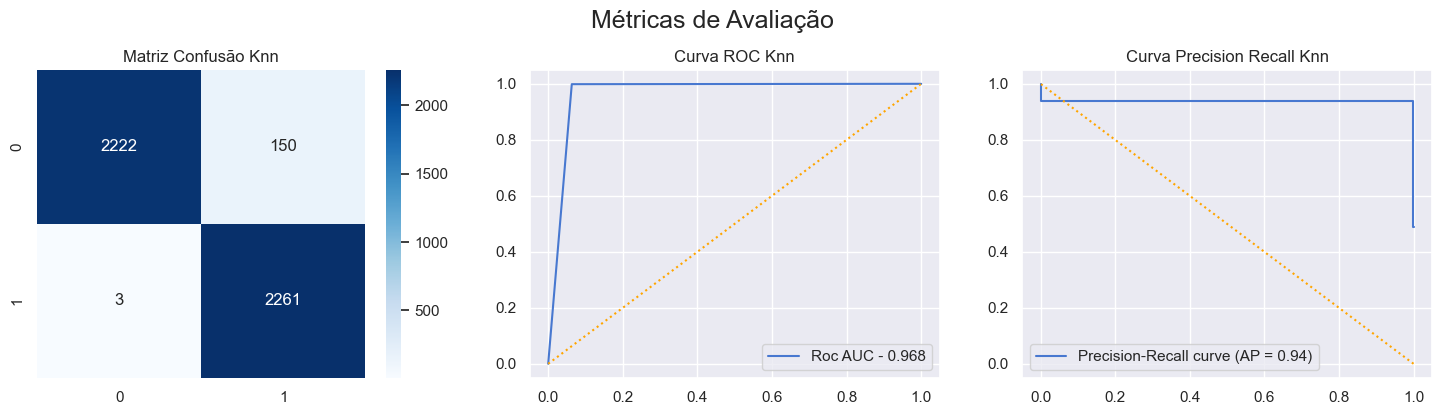

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Modelo Naive bayes:
Acurácia: 0.81
              precision    recall  f1-score   support

           0       0.87      0.74      0.80      2372
           1       0.77      0.89      0.82      2264

    accuracy                           0.81      4636
   macro avg       0.82      0.81      0.81      4636
weighted avg       0.82      0.81      0.81      4636



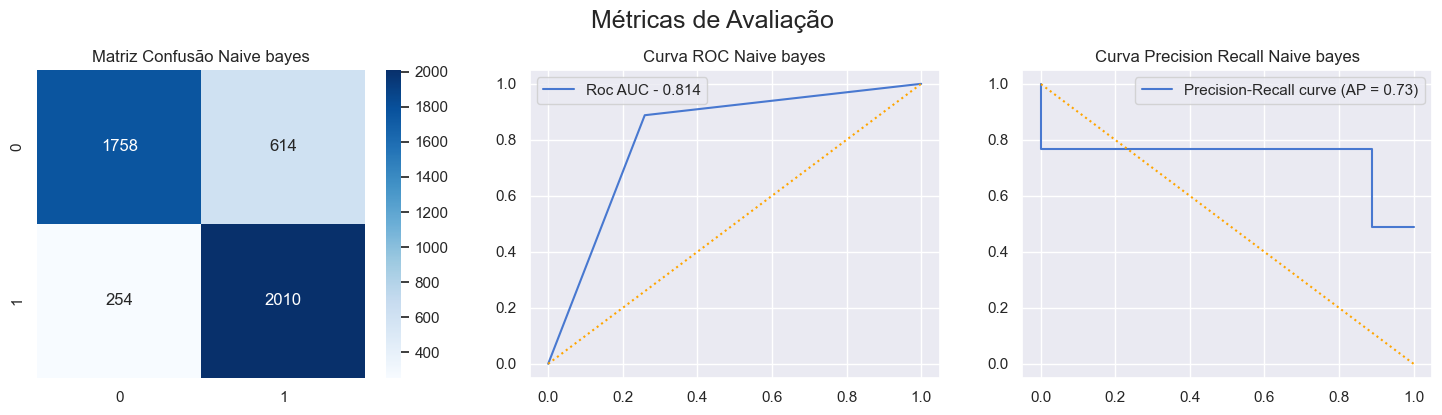

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Modelo Tree:
Acurácia: 0.98
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2372
           1       0.98      0.98      0.98      2264

    accuracy                           0.98      4636
   macro avg       0.98      0.98      0.98      4636
weighted avg       0.98      0.98      0.98      4636



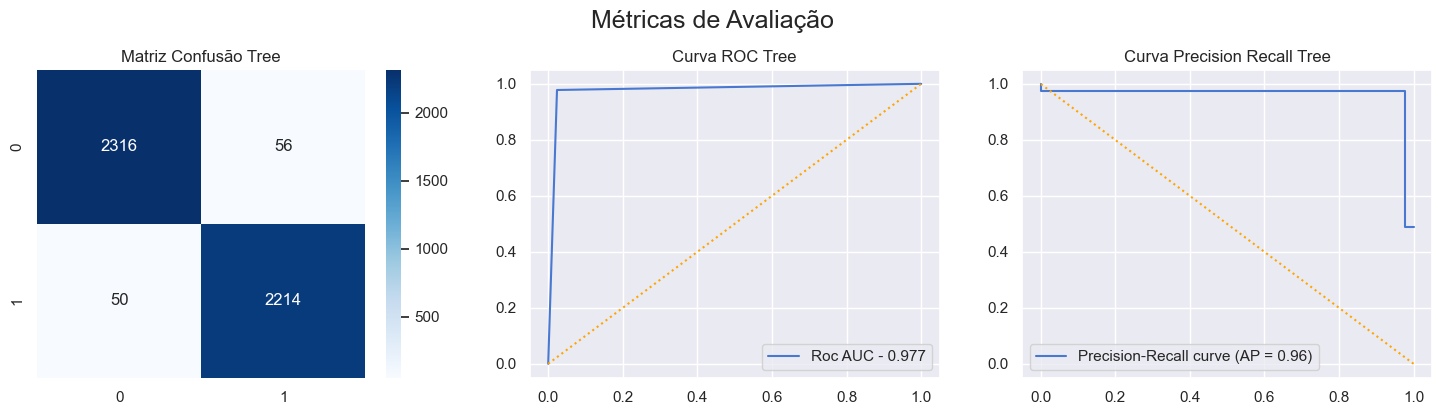

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Modelo Random forest:
Acurácia: 0.99
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2372
           1       0.98      0.99      0.99      2264

    accuracy                           0.99      4636
   macro avg       0.99      0.99      0.99      4636
weighted avg       0.99      0.99      0.99      4636



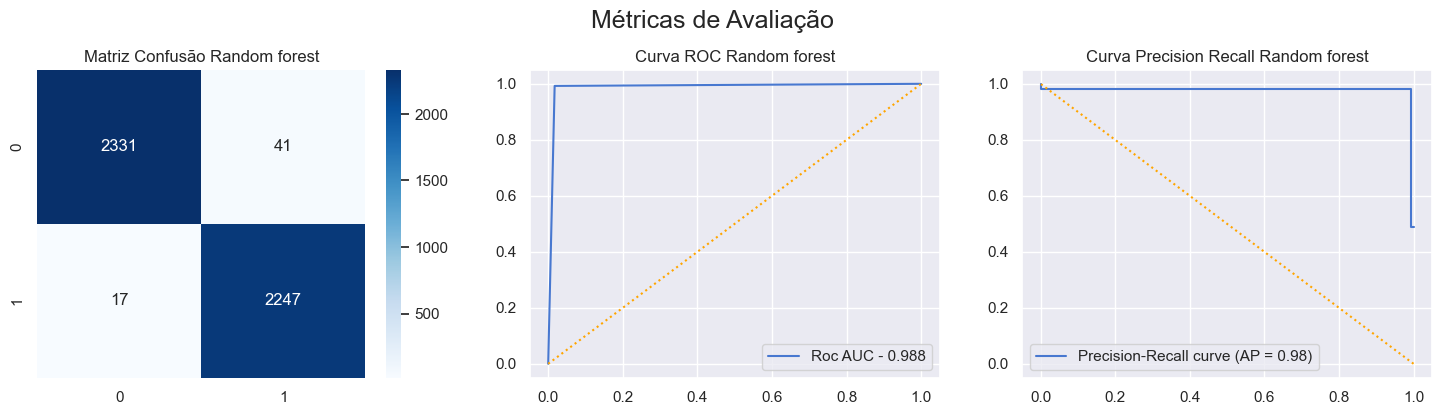

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Modelo Svm:
Acurácia: 0.95
              precision    recall  f1-score   support

           0       0.97      0.92      0.95      2372
           1       0.92      0.97      0.95      2264

    accuracy                           0.95      4636
   macro avg       0.95      0.95      0.95      4636
weighted avg       0.95      0.95      0.95      4636



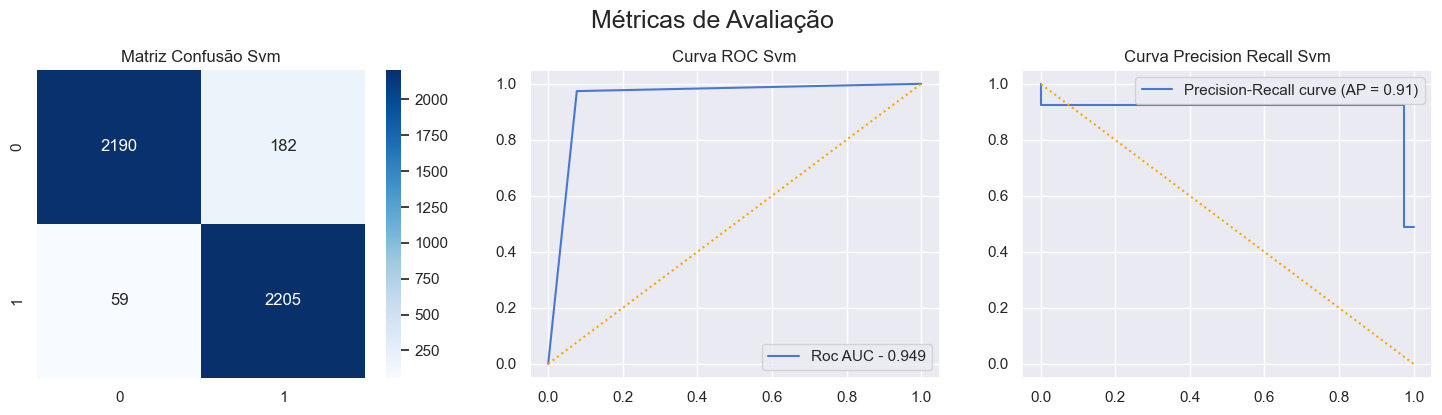

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Modelo Rna:
Acurácia: 0.95
              precision    recall  f1-score   support

           0       0.97      0.93      0.95      2372
           1       0.93      0.97      0.95      2264

    accuracy                           0.95      4636
   macro avg       0.95      0.95      0.95      4636
weighted avg       0.95      0.95      0.95      4636



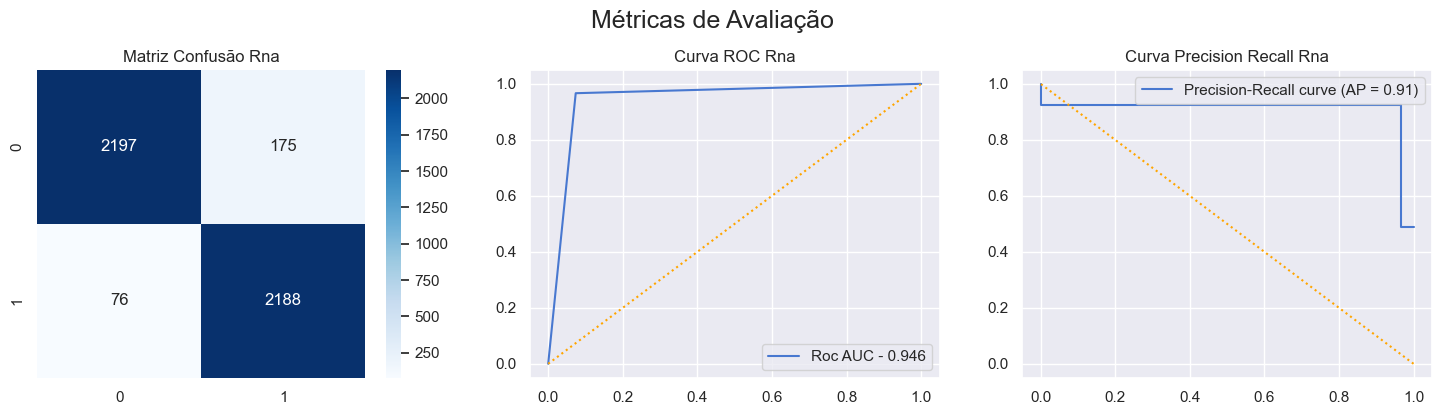

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


In [59]:
# Treinando o modelo e vendo suas métricas

models = {
    'knn': KNeighborsClassifier(),
    'naive_bayes': GaussianNB(),
    'tree': DecisionTreeClassifier(),
    'random_forest': RandomForestClassifier(),
    'svm': SVC(),
    'rna': MLPClassifier(max_iter=1000)
}

for name_model, model in models.items():
    model.fit(X_train_smote, y_train_smote)
    y_pred = model.predict(X_test_smote)

    # Métricas de Avaliação
    acuracia = accuracy_score(y_test_smote, y_pred)
    fpr, tpr, _ = roc_curve(y_test_smote, y_pred)
    roc_score = roc_auc_score(y_test_smote, y_pred)
    avg_precision = average_precision_score(y_test_smote, y_pred,)
    roc_recall = recall_score(y_test_smote, y_pred)
    precision, recall, _ = precision_recall_curve(y_test_smote, y_pred)
    avg_precision = average_precision_score(y_test_smote, y_pred)
    matriz_confusao = confusion_matrix(y_test_smote, y_pred)

    print(f"Modelo {name_model.replace('_', ' ').capitalize()}:")
    print(f'Acurácia: {acuracia:.2f}')
    print(classification_report(y_test_smote, y_pred))

    # Gráficos
    fig, ax = plt.subplots(1, 3, figsize=(18,4))
    plt.suptitle('Métricas de Avaliação', y=1.03, fontsize=18)

    ax[0] = sns.heatmap(matriz_confusao, annot=True, fmt='.0f', cmap='Blues', ax=ax[0])
    ax[0].set_title(f"Matriz Confusão {name_model.replace('_', ' ').capitalize()}")

    ax[1].plot(fpr, tpr)
    ax[1].plot([0,1],[0,1], ls=':', c='orange')
    ax[1].legend([f'Roc AUC - {roc_score:.3f}'])
    ax[1].set_title(f"Curva ROC {name_model.replace('_', ' ').capitalize()}")

    ax[2].step(recall, precision, color='b', where='post', label='Precision-Recall curve (AP = %0.2f)' % avg_precision)
    ax[2].plot([1,0],[0,1], ls=':', c='orange')
    ax[2].set_title(f"Curva Precision Recall {name_model.replace('_', ' ').capitalize()}")
    ax[2].legend()

    plt.show()
    print('-----'*30)


In [108]:
# KNN, Tree, Random Forest, RNA

#### <font color='pink'>**2.7.5 Validação Cruzada**


#### <font color='pink'>**2.7.6 Comparação de Modelos (Estatísticamente)**


#### <font color='pink'>**2.7.7 Otimização de Modelo (Tunning)**


#### <font color='pink'>**2.7.8 Modelo Final**


### <font color='#ff6600'>**2.8 Interpretação e Avaliação Final**


## <font color='yellow'>**3. Classificação Multiclasse**


## 